<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/DeliveryTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_squared_error
warnings.filterwarnings("ignore")

In [3]:
## importing data sets
#Train dataset
data_train=pd.read_csv('/content/Train.csv')
# riders dataset
data_riders = pd.read_csv("/content/Riders.csv")

In [4]:
#previewing the train dataset
data_train.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3.0,Business,9.0,5.0,9:35:46 AM,9.0,5.0,9:40:10 AM,9.0,5.0,10:04:47 AM,9.0,5.0,10:27:30 AM,9.0,5.0,10:39:55 AM,4.0,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3.0,Personal,12.0,5.0,11:16:16 AM,12.0,5.0,11:23:21 AM,12.0,5.0,11:40:22 AM,12.0,5.0,11:44:09 AM,12.0,5.0,12:17:22 PM,16.0,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0


In [5]:
# checking for the Total  number of rows and columns
data_train.shape

(16291, 29)

In [6]:
# previewing the riders dataset
data_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [7]:
## the shape of the datasets
data_riders.shape

(960, 5)

In [8]:
#data types(train dataset)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   16291 non-null  object 
 1   User Id                                    16290 non-null  object 
 2   Vehicle Type                               16290 non-null  object 
 3   Platform Type                              16290 non-null  float64
 4   Personal or Business                       16290 non-null  object 
 5   Placement - Day of Month                   16290 non-null  float64
 6   Placement - Weekday (Mo = 1)               16290 non-null  float64
 7   Placement - Time                           16290 non-null  object 
 8   Confirmation - Day of Month                16290 non-null  float64
 9   Confirmation - Weekday (Mo = 1)            16290 non-null  float64
 10  Confirmation - Time   

In [9]:

#### data infor for riders
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [10]:
#checking for missing values in the train
print(data_train.isnull().sum())

Order No                                         0
User Id                                          1
Vehicle Type                                     1
Platform Type                                    1
Personal or Business                             1
Placement - Day of Month                         1
Placement - Weekday (Mo = 1)                     1
Placement - Time                                 1
Confirmation - Day of Month                      1
Confirmation - Weekday (Mo = 1)                  1
Confirmation - Time                              1
Arrival at Pickup - Day of Month                 1
Arrival at Pickup - Weekday (Mo = 1)             1
Arrival at Pickup - Time                         1
Pickup - Day of Month                            1
Pickup - Weekday (Mo = 1)                        1
Pickup - Time                                    1
Arrival at Destination - Day of Month            1
Arrival at Destination - Weekday (Mo = 1)        1
Arrival at Destination - Time  

In [11]:
#filling missing values in Temperature with mean
data_train['Temperature'] = data_train['Temperature'].fillna(value = data_train['Temperature'].mean())

# dropping the column that contains atleast one missing value(precipitation in mm)
data_train=data_train.drop('Precipitation in millimeters',axis=1)
data_train.dropna(inplace = True)

#checking for duplicates
print(data_train.duplicated().sum())

0


In [12]:
 print(data_train.isnull().sum())

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

In [13]:
# Removing spaces in the column names.
data_train.columns = data_train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace("-", "")
data_train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement__day_of_month',
       'placement__weekday_mo_=_1', 'placement__time',
       'confirmation__day_of_month', 'confirmation__weekday_mo_=_1',
       'confirmation__time', 'arrival_at_pickup__day_of_month',
       'arrival_at_pickup__weekday_mo_=_1', 'arrival_at_pickup__time',
       'pickup__day_of_month', 'pickup__weekday_mo_=_1', 'pickup__time',
       'arrival_at_destination__day_of_month',
       'arrival_at_destination__weekday_mo_=_1',
       'arrival_at_destination__time', 'distance_km', 'temperature',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival'],
      dtype='object')

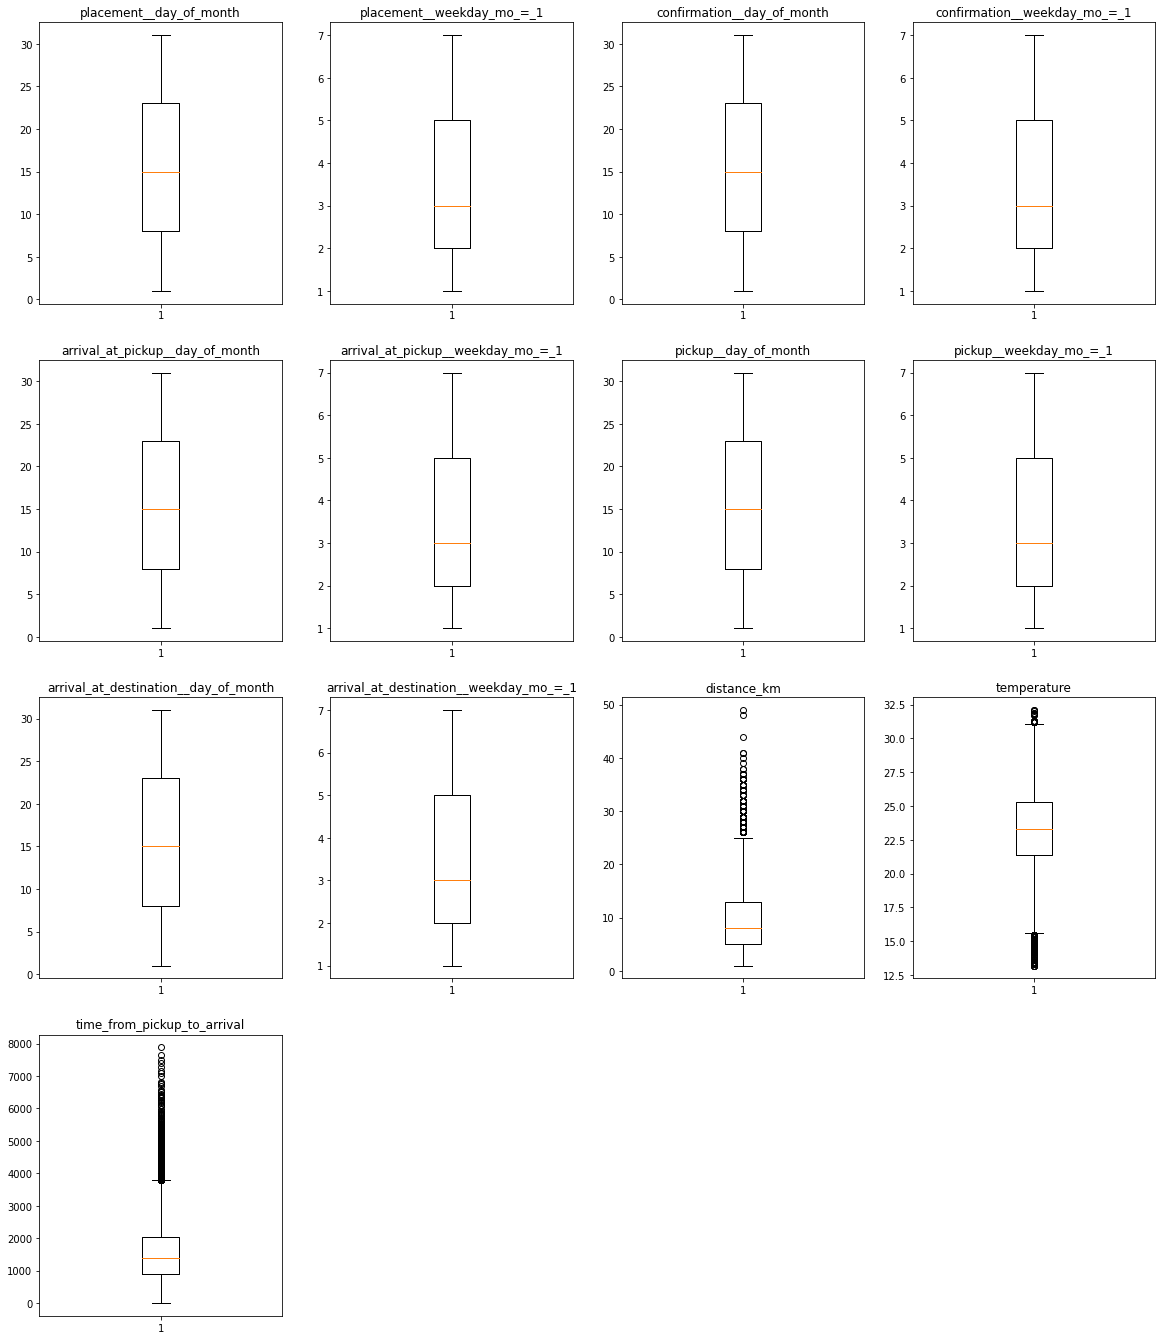

In [14]:
#checking for outliers
num_cols = {'placement__day_of_month':1,
       'placement__weekday_mo_=_1':2,
       'confirmation__day_of_month':3, 'confirmation__weekday_mo_=_1':4,
       'arrival_at_pickup__day_of_month':5,
       'arrival_at_pickup__weekday_mo_=_1':6,
       'pickup__day_of_month':7, 'pickup__weekday_mo_=_1':8,
       'arrival_at_destination__day_of_month':9,
       'arrival_at_destination__weekday_mo_=_1':10,
       'distance_km':11, 'temperature':12,'time_from_pickup_to_arrival':13}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in num_cols.items():
  plt.subplot(5,4,i)
  plt.boxplot(data_train[variable])
  plt.title(variable)

plt.show()

In [15]:
### removing outliers in time from pick up to arrival column
condition = [
    (data_train['time_from_pickup_to_arrival'] >= 1) & (data_train['time_from_pickup_to_arrival'] <= 120), (data_train['time_from_pickup_to_arrival'] >=120)]
values = ['below 120', 'above 120']
data_train['pick_up_delivery_time_group'] = np.select(condition, values)
data_train =data_train.loc[data_train['pick_up_delivery_time_group'] == 'above 120']

In [16]:

### looking for missing values in data_riders dataset
data_riders.isnull().sum()

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

In [17]:
#removing  spaces in data_riders's columns
data_riders.columns = data_riders.columns.str.lower().str.replace(' ', '_')
data_riders.columns

Index(['rider_id', 'no_of_orders', 'age', 'average_rating', 'no_of_ratings'], dtype='object')

In [18]:

## merging the rider and train dataset.
train = data_train.merge(data_riders, on='rider_id', how='left')
train.head(3)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement__day_of_month,placement__weekday_mo_=_1,placement__time,confirmation__day_of_month,confirmation__weekday_mo_=_1,confirmation__time,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo_=_1,arrival_at_pickup__time,pickup__day_of_month,pickup__weekday_mo_=_1,pickup__time,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo_=_1,arrival_at_destination__time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,pick_up_delivery_time_group,no_of_orders,age,average_rating,no_of_ratings
0,Order_No_4211,User_Id_633,Bike,3.0,Business,9.0,5.0,9:35:46 AM,9.0,5.0,9:40:10 AM,9.0,5.0,10:04:47 AM,9.0,5.0,10:27:30 AM,9.0,5.0,10:39:55 AM,4.0,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,above 120,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3.0,Personal,12.0,5.0,11:16:16 AM,12.0,5.0,11:23:21 AM,12.0,5.0,11:40:22 AM,12.0,5.0,11:44:09 AM,12.0,5.0,12:17:22 PM,16.0,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,above 120,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3.0,Business,30.0,2.0,12:39:25 PM,30.0,2.0,12:42:44 PM,30.0,2.0,12:49:34 PM,30.0,2.0,12:53:03 PM,30.0,2.0,1:00:38 PM,3.0,23.274194,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,above 120,1023,242,12.5,114


In [19]:

## grouping the label column to visualize it and understand it 
conditions = [
    (train['time_from_pickup_to_arrival'] >= 1) & (train['time_from_pickup_to_arrival'] <= 1600),
    (train['time_from_pickup_to_arrival'] >= 1601) & (train['time_from_pickup_to_arrival'] <= 3200),
    (train['time_from_pickup_to_arrival'] >= 3201) & (train['time_from_pickup_to_arrival'] <= 4800),
    (train['time_from_pickup_to_arrival'] >= 4801) & (train['time_from_pickup_to_arrival'] <= 6400),
    (train['time_from_pickup_to_arrival'] >= 6401) & (train['time_from_pickup_to_arrival'] <= 8000)
    ]
# create a list of the values we want to assign for each condition
values = ['Below 1600', '1601-3200', '3201-4800', '4801-6400', 'above 6400']   
# create a new column and use np.select to assign values to it using our lists as arguments
train['time_from_pickup_to_arrival_group'] = np.select(conditions, values)

In [20]:

# Create a list to store the data
Place_Day_Month = []
# Using a for loop to populate the list
for Each_Day in train['placement__day_of_month']:
    if (Each_Day > 0 and Each_Day <=7):
        Place_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Place_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Place_Day_Month.append('3rd Week')
    else:
        Place_Day_Month.append('4th Week')           
# Storing the data as a column in train columns
train['placement_day_into_weeks'] = Place_Day_Month

In [21]:

# Import datetime Library
from datetime import datetime as dt
# converting placement time in hours 
train['placement'] = train['placement__time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
train['placement_hour'] = train['placement'].dt.hour
## converting confirmation time into hours
train['confirmation'] = train['confirmation__time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
train['confirmation_hour'] = train['confirmation'].dt.hour
#converting arrival time into hours
train['arrival_at_pickup'] = train['arrival_at_pickup__time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
train['arrival_at_pickup_hour'] = train['arrival_at_pickup'].dt.hour

In [22]:

## grouping the placement _hour from to Early morning to late night
## a function to classify time of day
def get_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
#Appending the Categorized get_hr onto the Extracted hour from the timdestamp
train['placement_time_of_day'] = train['placement_hour'].apply(get_hr)

In [23]:

## Grouping the arrival hour from Early morning to Late Night
## a function to classify time of day
def get_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
#Appending the Categorized get_hr onto the Extracted hour from the timdestamp
train['arrival time of day'] = train['arrival_at_pickup_hour'].apply(get_hr)

In [24]:
## Grouping the confirmation hours from early morning to late night
## a function to classify time of day
def get_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
#Appending the Categorized get_hr onto the Extracted hour from the timdestamp
train['confirmation time of  day'] = train['confirmation_hour'].apply(get_hr)

In [25]:

## creating  weekend and week days
train['weekend/week day'] = np.where(train['placement__weekday_mo_=_1']< 6,'Weekday','Weekend')

In [26]:

## cleaning data
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement__day_of_month,placement__weekday_mo_=_1,placement__time,confirmation__day_of_month,confirmation__weekday_mo_=_1,confirmation__time,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo_=_1,arrival_at_pickup__time,pickup__day_of_month,pickup__weekday_mo_=_1,pickup__time,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo_=_1,arrival_at_destination__time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,pick_up_delivery_time_group,no_of_orders,age,average_rating,no_of_ratings,time_from_pickup_to_arrival_group,placement_day_into_weeks,placement,placement_hour,confirmation,confirmation_hour,arrival_at_pickup,arrival_at_pickup_hour,placement_time_of_day,arrival time of day,confirmation time of day,weekend/week day
0,Order_No_4211,User_Id_633,Bike,3.0,Business,9.0,5.0,9:35:46 AM,9.0,5.0,9:40:10 AM,9.0,5.0,10:04:47 AM,9.0,5.0,10:27:30 AM,9.0,5.0,10:39:55 AM,4.0,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,above 120,1637,1309,13.8,549,Below 1600,2nd Week,1900-01-01 09:35:46,9,1900-01-01 09:40:10,9,1900-01-01 10:04:47,10,Morning,Morning,Morning,Weekday
1,Order_No_25375,User_Id_2285,Bike,3.0,Personal,12.0,5.0,11:16:16 AM,12.0,5.0,11:23:21 AM,12.0,5.0,11:40:22 AM,12.0,5.0,11:44:09 AM,12.0,5.0,12:17:22 PM,16.0,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,above 120,396,339,13.6,69,1601-3200,2nd Week,1900-01-01 11:16:16,11,1900-01-01 11:23:21,11,1900-01-01 11:40:22,11,Morning,Morning,Morning,Weekday
2,Order_No_1899,User_Id_265,Bike,3.0,Business,30.0,2.0,12:39:25 PM,30.0,2.0,12:42:44 PM,30.0,2.0,12:49:34 PM,30.0,2.0,12:53:03 PM,30.0,2.0,1:00:38 PM,3.0,23.274194,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,above 120,1023,242,12.5,114,Below 1600,4th Week,1900-01-01 12:39:25,12,1900-01-01 12:42:44,12,1900-01-01 12:49:34,12,Noon,Noon,Noon,Weekday
3,Order_No_9336,User_Id_1402,Bike,3.0,Business,15.0,5.0,9:25:34 AM,15.0,5.0,9:26:05 AM,15.0,5.0,9:37:56 AM,15.0,5.0,9:43:06 AM,15.0,5.0,10:05:27 AM,9.0,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,above 120,886,283,14.5,113,Below 1600,2nd Week,1900-01-01 09:25:34,9,1900-01-01 09:26:05,9,1900-01-01 09:37:56,9,Morning,Morning,Morning,Weekday
4,Order_No_27883,User_Id_1737,Bike,1.0,Personal,13.0,1.0,9:55:18 AM,13.0,1.0,9:56:18 AM,13.0,1.0,10:03:53 AM,13.0,1.0,10:05:23 AM,13.0,1.0,10:25:37 AM,9.0,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,above 120,2311,872,14.1,533,Below 1600,2nd Week,1900-01-01 09:55:18,9,1900-01-01 09:56:18,9,1900-01-01 10:03:53,10,Morning,Morning,Morning,Weekday


In [27]:

### exportthe updated data
train.to_csv('data.csv')

In [28]:
# Univariate Analysis
# summary statistic
train.describe()

,platform_type,placement__day_of_month,placement__weekday_mo_=_1,confirmation__day_of_month,confirmation__weekday_mo_=_1,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo_=_1,pickup__day_of_month,pickup__weekday_mo_=_1,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo_=_1,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings,placement_hour,confirmation_hour,arrival_at_pickup_hour
count,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000,15653.000000
mean,2.741264,15.563598,3.244618,15.563790,3.244809,15.563790,3.244809,15.563790,3.244809,15.563790,3.244809,9.656296,23.236274,-1.281557,36.811175,-1.282864,36.811175,1624.299623,1639.617326,972.556698,13.894551,339.014694,12.313295,12.438766,12.655082
std,0.636951,8.835174,1.576573,8.835137,1.576483,8.835137,1.576483,8.835137,1.576483,8.835137,1.576483,5.683946,3.228730,0.030546,0.037914,0.035352,0.045263,960.170764,1494.086270,635.958793,0.893505,401.777268,2.533164,2.550043,2.551098
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,-1.438302,36.653621,-1.430298,36.606594,121.000000,2.000000,96.000000,0.000000,0.000000,6.000000,6.000000,7.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.300000,-1.300921,36.783660,-1.301520,36.784968,939.000000,557.000000,495.000000,13.700000,61.000000,10.000000,10.000000,11.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.274194,-1.279395,36.806837,-1.285032,36.807990,1414.000000,1208.000000,872.000000,14.100000,158.000000,12.000000,12.000000,13.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.300000,-1.257147,36.829243,-1.261108,36.829263,2076.000000,2273.000000,1217.000000,14.300000,501.000000,14.000000,14.000000,15.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000,21.000000,21.000000,22.000000


In [29]:

### number of orders
print('Total number of orders: ',len(train['order_no'].unique()))

Total number of orders:  15653


In [30]:
##number of riders
print('Number of riders :   ',len(train['rider_id'].unique()))

Number of riders :    901


In [31]:

#number of users/ customers
print('Number of customers: ',len(train['user_id'].unique()))

Number of customers:  2716


In [32]:
#summary statistics
train[['temperature','distance_km','time_from_pickup_to_arrival']].agg([np.mean,np.median])

,temperature,distance_km,time_from_pickup_to_arrival
mean,23.236274,9.656296,1624.299623
median,23.274194,8.000000,1414.000000


In [33]:
## number of orders per platform type

train.pivot_table(values='order_no',index='platform_type',
                       columns='personal_or_business',aggfunc='count',margins=True,fill_value=0).sort_values(by=['Business','Personal']
                                                                                   ,ascending=False)

personal_or_business,Business,Personal,All
platform_type,,,
All,12726,2927,15653
3.0,12437,795,13232
1.0,228,1431,1659
2.0,46,701,747
4.0,15,0,15


In [34]:
##### number orders per  day

train.pivot_table(values='order_no',index='placement__day_of_month',
                       columns='personal_or_business',aggfunc='count',margins=True,fill_value=0).sort_values(by=['Business','Personal']
                                                                                   ,ascending=False)

personal_or_business,Business,Personal,All
placement__day_of_month,,,
All,12726,2927,15653
8.0,531,91,622
14.0,523,107,630
7.0,503,90,593
13.0,478,98,576
6.0,475,116,591
5.0,473,103,576
30.0,468,73,541
4.0,466,119,585


In [35]:

### Number of minutes per platform
train.groupby('platform_type')['time_from_pickup_to_arrival'].agg([np.mean]).sort_values(by='mean',ascending=False)

,mean
platform_type,
4.0,1787.666667
3.0,1632.683872
1.0,1579.917420
2.0,1571.072289


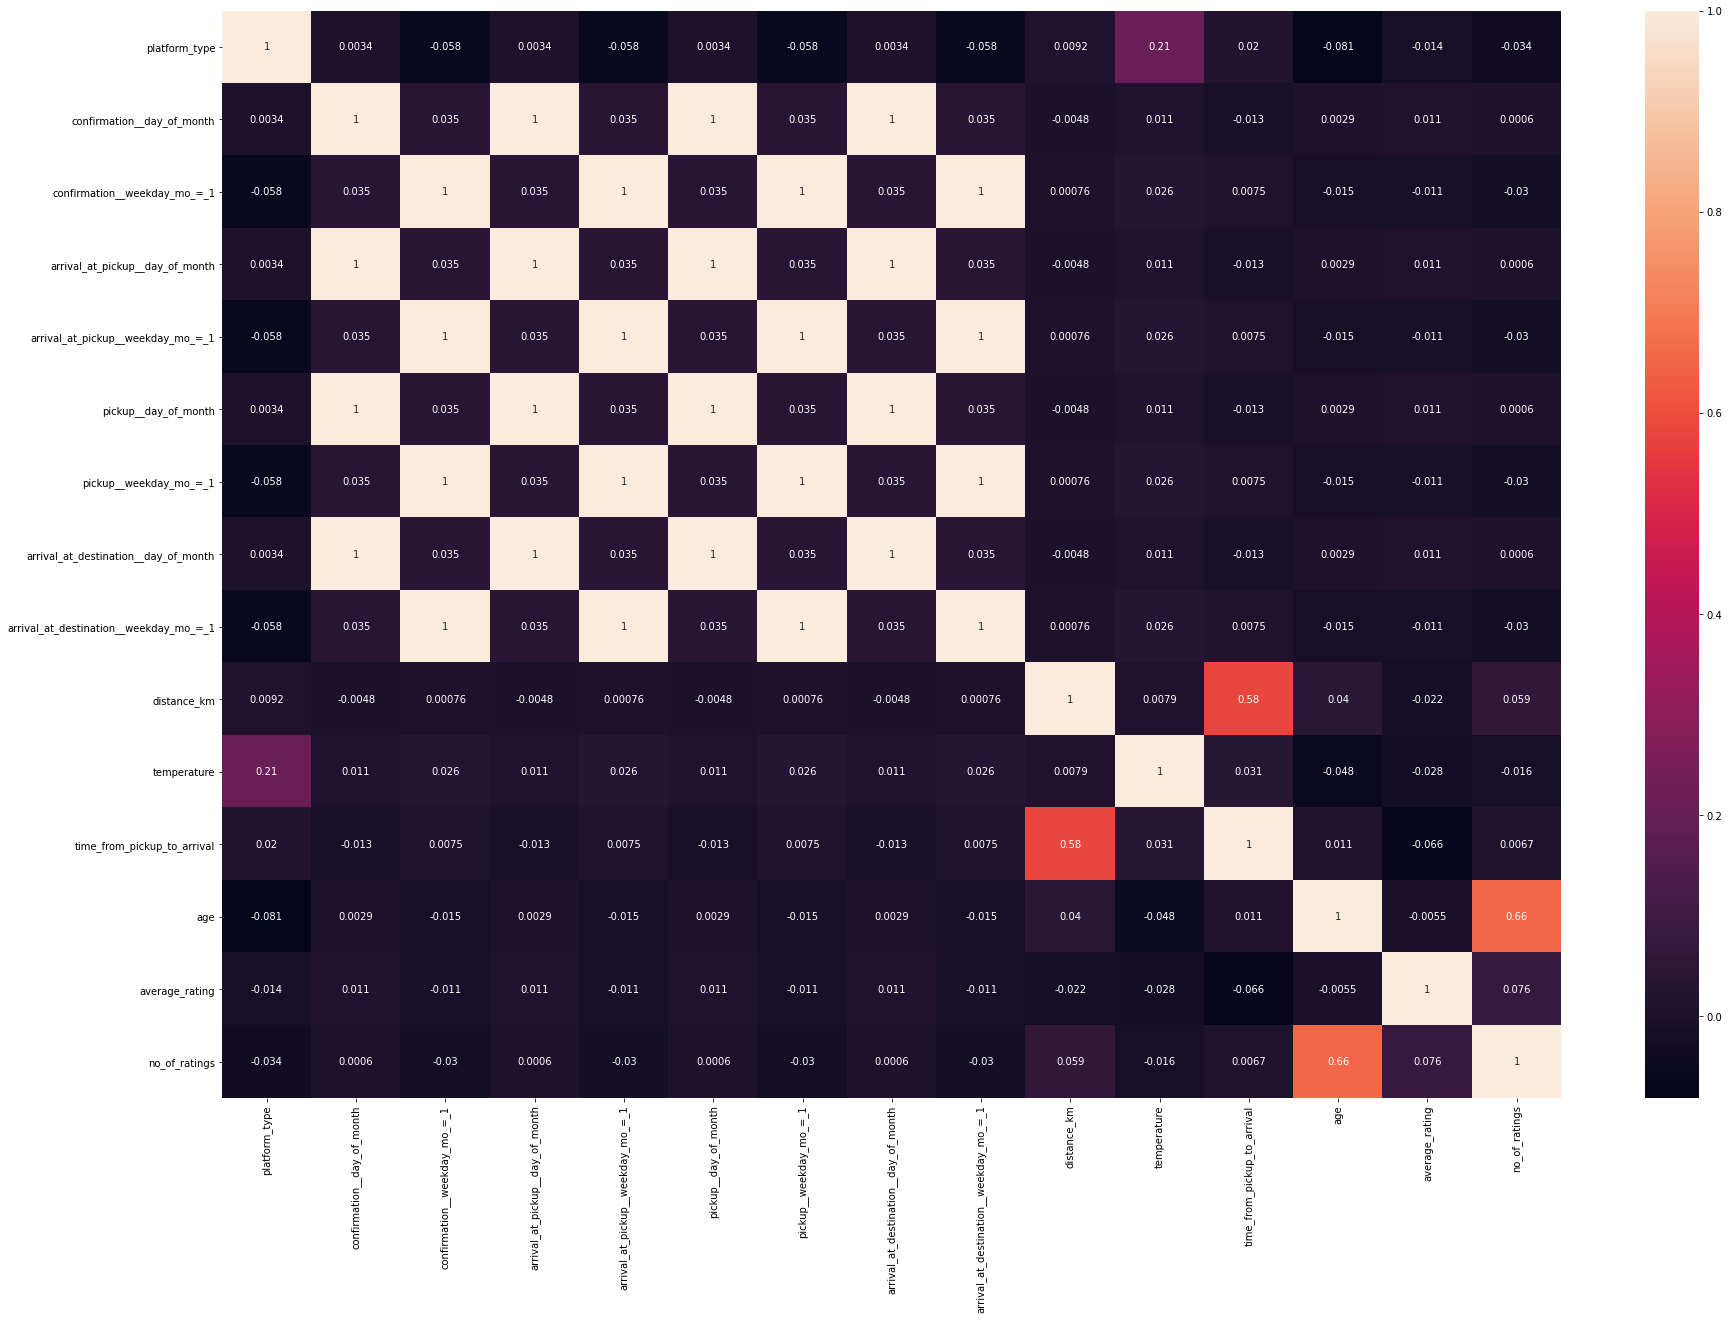

In [36]:
#Bivariate Analysis

# pearson correlation coefficient

new_train = train[['platform_type', 'personal_or_business', 'confirmation__day_of_month', 'confirmation__weekday_mo_=_1','arrival_at_pickup__day_of_month',
             'arrival_at_pickup__weekday_mo_=_1', 'pickup__day_of_month','pickup__weekday_mo_=_1', 'arrival_at_destination__day_of_month', 'arrival_at_destination__weekday_mo_=_1',
             'distance_km', 'temperature', 'time_from_pickup_to_arrival', 'age', 'average_rating', 'no_of_ratings']]
plt.figure(figsize = (30, 20))
sns.heatmap(new_train.corr(),annot=True)
plt.show()

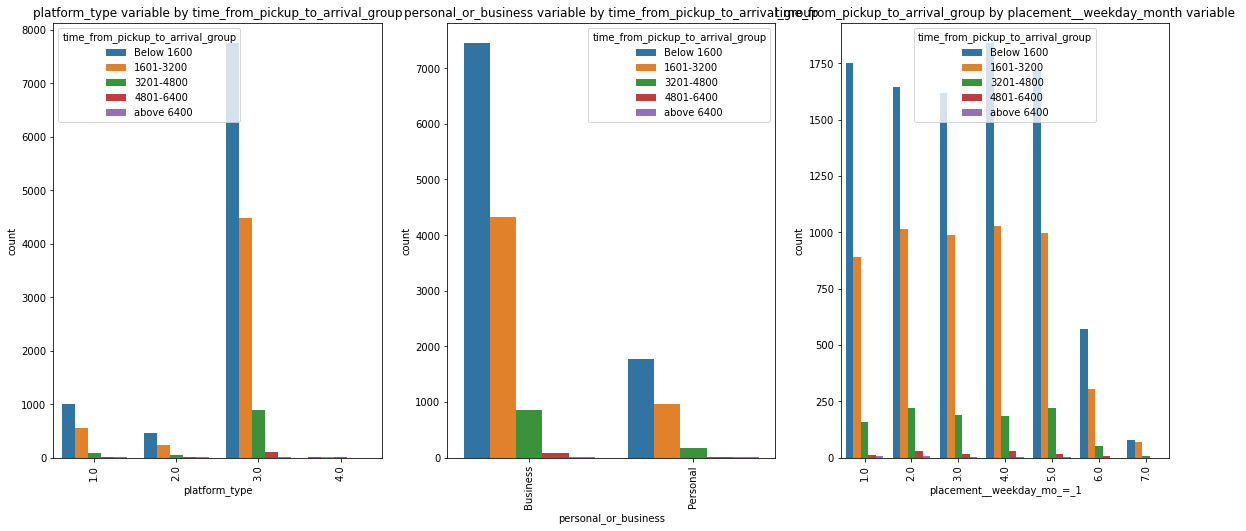

In [37]:
# comparing time from pickup to arrival group with, platform_type, personal_or_business, placement__weekday_mo_=_1
fig,ax=plt.subplots(1,3,figsize=(20,8))

sns.countplot('platform_type',hue='time_from_pickup_to_arrival_group',data=train,ax=ax[0])
ax[0].set_title('platform_type variable by time_from_pickup_to_arrival_group')


sns.countplot('personal_or_business',hue='time_from_pickup_to_arrival_group',data=train,ax=ax[1])
ax[1].set_title('personal_or_business variable by time_from_pickup_to_arrival_group')


sns.countplot('placement__weekday_mo_=_1',hue='time_from_pickup_to_arrival_group',data=train,ax=ax[2])
ax[2].set_title(' time_from_pickup_to_arrival_group by placement__weekday_month variable ')



for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

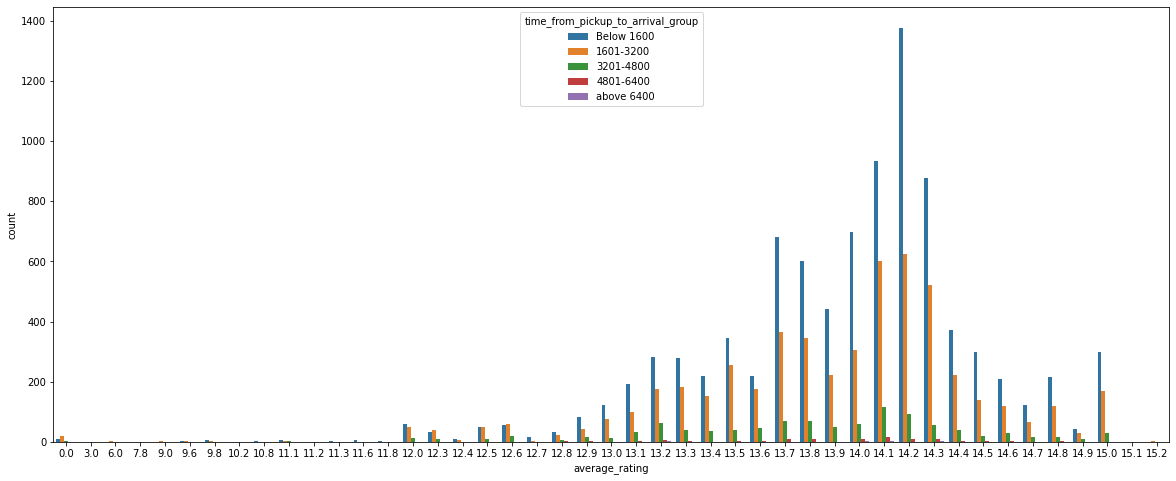

In [38]:
# time from pickup to arrival by the average rating variable
plt.figure(figsize=(20,8))
sns.countplot('average_rating', hue='time_from_pickup_to_arrival_group', data=train)

<Figure size 1440x1080 with 0 Axes>

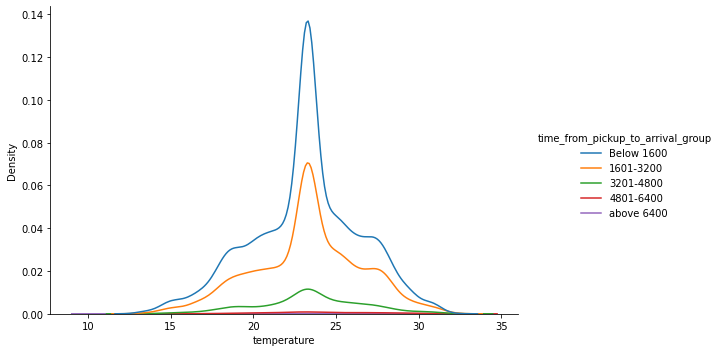

In [39]:
# time of delivery by temperature
plt.figure(figsize = (20, 15))
sns.displot(x='temperature', hue='time_from_pickup_to_arrival_group', data=train, kind='kde', aspect=1.5)

<Figure size 1440x1080 with 0 Axes>

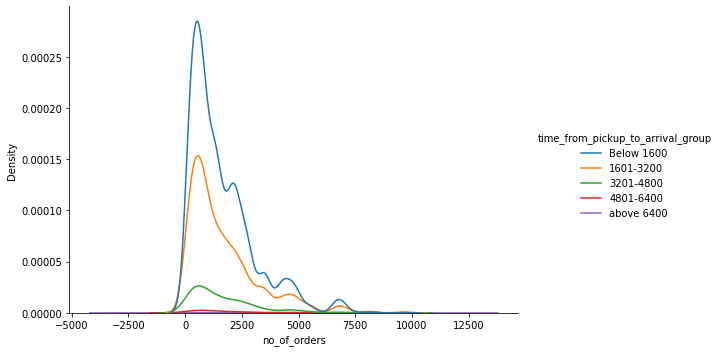

In [40]:
# time from pick up to arrival by no of orders
plt.figure(figsize = (20, 15))
sns.displot(x='no_of_orders', hue='time_from_pickup_to_arrival_group', data=train, kind='kde', aspect=1.5)

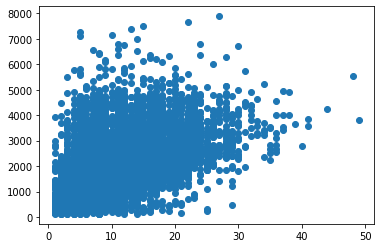

In [41]:
# scatterplot showing the correlaton between distance in km and time from pickup to arrival

plt.scatter(train['distance_km'], train['time_from_pickup_to_arrival'])

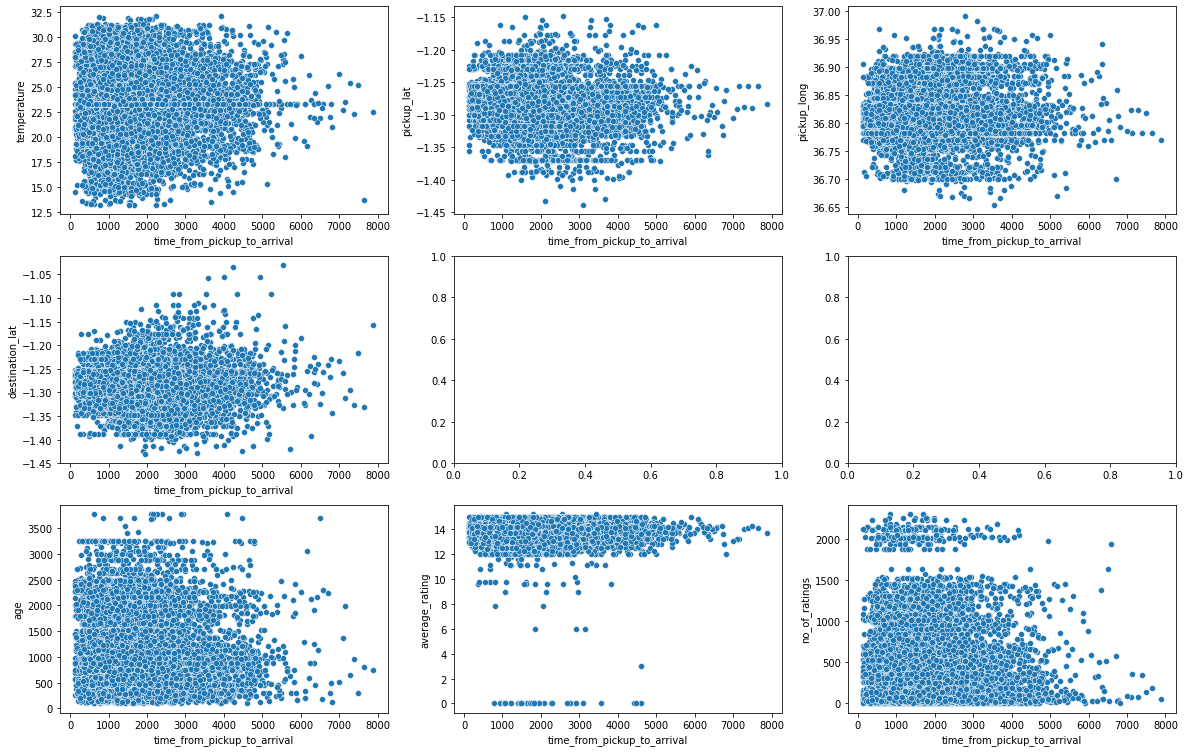

In [42]:
###looking if its linear relation
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(20,13))
sns.scatterplot(x='time_from_pickup_to_arrival',y='temperature',data=train,ax=ax1)
sns.scatterplot(x='time_from_pickup_to_arrival',y='pickup_lat',data=train,ax=ax2)
sns.scatterplot(x='time_from_pickup_to_arrival',y='pickup_long',data=train,ax=ax3)
sns.scatterplot(x='time_from_pickup_to_arrival',y='destination_lat',data=train,ax=ax4)
sns.scatterplot(x='time_from_pickup_to_arrival',y='age',data=train,ax=ax7)
sns.scatterplot(x='time_from_pickup_to_arrival',y='average_rating',data=train,ax=ax8)
sns.scatterplot(x='time_from_pickup_to_arrival',y='no_of_ratings',data=train,ax=ax9)

In [43]:
# excluding columns that will not serve a purpose since we have new varables to use 
del train['order_no']
del train['user_id']
del train['vehicle_type']
del train['placement__time']
del train['confirmation__time']
del train['arrival_at_pickup__time']
del train['arrival_at_destination__time']
del train['pickup__time']
del train['rider_id']
del train['pick_up_delivery_time_group']

del train['placement_hour']
del train['placement']
del train['confirmation']
del train['confirmation_hour']
del train['arrival_at_pickup']
del train['arrival_at_pickup_hour']
del train['placement__day_of_month']
del train['placement__weekday_mo_=_1']
del train['confirmation__weekday_mo_=_1']
del train['confirmation__day_of_month']
del train['arrival_at_pickup__day_of_month']
del train['arrival_at_pickup__weekday_mo_=_1']
del train['pickup__day_of_month']
del train['pickup__weekday_mo_=_1']
del train['arrival_at_destination__day_of_month']
del train['arrival_at_destination__weekday_mo_=_1']
del train['time_from_pickup_to_arrival_group']

In [44]:
### our data to feature engineer
train.head()

,platform_type,personal_or_business,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings,placement_day_into_weeks,placement_time_of_day,arrival time of day,confirmation time of day,weekend/week day
0,3.0,Business,4.0,20.400000,-1.317755,36.830370,-1.300406,36.829741,745.0,1637,1309,13.8,549,2nd Week,Morning,Morning,Morning,Weekday
1,3.0,Personal,16.0,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993.0,396,339,13.6,69,2nd Week,Morning,Morning,Morning,Weekday
2,3.0,Business,3.0,23.274194,-1.308284,36.843419,-1.300921,36.828195,455.0,1023,242,12.5,114,4th Week,Noon,Noon,Noon,Weekday
3,3.0,Business,9.0,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341.0,886,283,14.5,113,2nd Week,Morning,Morning,Morning,Weekday
4,1.0,Personal,9.0,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214.0,2311,872,14.1,533,2nd Week,Morning,Morning,Morning,Weekday


In [45]:

# performing label encoding to the columns:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
 # personal_or_business
train['personal_or_business']=le.fit_transform(train['personal_or_business'])
# placement_time_of_day
train['placement_time_of_day'] = le.fit_transform(train['placement_time_of_day'])

# weekend/week day
train['weekend/week day'] = le.fit_transform(train['weekend/week day'])

# placement_day_into_weeks
train['placement_day_into_weeks'] = le.fit_transform(train['placement_day_into_weeks'])
##arrival time of day
train['arrival time of day'] = le.fit_transform(train['arrival time of day'])
## confirmation
train['confirmation time of  day']=le.fit_transform(train['confirmation time of  day'])

In [46]:
#split the features to independent and target variable
y=train['time_from_pickup_to_arrival']
x=train.drop('time_from_pickup_to_arrival',axis=1)

In [47]:
#feature selection using stepwise regression
# our alpha is 0.05, hence we drop features  that pvalue > alpha
import statsmodels.api as sm
x=sm.add_constant(x)
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     time_from_pickup_to_arrival   R-squared:                       0.349
Model:                                     OLS   Adj. R-squared:                  0.348
Method:                          Least Squares   F-statistic:                     492.9
Date:                         Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                                 20:59:46   Log-Likelihood:            -1.2634e+05
No. Observations:                        15653   AIC:                         2.527e+05
Df Residuals:                            15635   BIC:                         2.529e+05
Df Model:                                   17                                         
Covariance Type:                     nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      3.688e+04   7790.730      4.734      0.000    2.16e+04    5.22e+04
platform_type                21.0873     14.171      1.488      0.137      -6.689      48.863
personal_or_business         24.3992     23.126      1.055      0.291     -20.930      69.728
distance_km                  99.8306      1.130     88.349      0.000      97.616     102.045
temperature                   2.9104      2.155      1.350      0.177      -1.314       7.135
pickup_lat                  101.5470    208.872      0.486      0.627    -307.866     510.960
pickup_long                -851.8360    168.078     -5.068      0.000   -1181.288    -522.384
destination_lat            -315.9321    177.150     -1.783      0.075    -663.168      31.303
destination_long           -124.5223    139.322     -0.894      0.371    -397.609     148.564
no_of_orders                 -0.0014      0.010     -0.139      0.889      -0.020       0.018
age                           0.0070      0.013      0.525      0.600      -0.019       0.033
average_rating              -53.9793      6.991     -7.721      0.000     -67.682     -40.276
no_of_ratings                -0.0618      0.036     -1.722      0.085      -0.132       0.009
placement_day_into_weeks     -8.3398      5.624     -1.483      0.138     -19.363       2.684
placement_time_of_day       -41.3948     17.575     -2.355      0.019     -75.844      -6.945
arrival time of day          39.2245     12.662      3.098      0.002      14.406      64.043
confirmation time of  day    34.4855     21.141      1.631      0.103      -6.953      75.924
weekend/week day           -121.9682     24.640     -4.950      0.000    -170.265     -73.671
==============================================================================
Omnibus:                     6185.151   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30830.136
Skew:                           1.868   Prob(JB):                         0.00
Kurtosis:                       8.771   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
## removing  the the features that pvalue > alpha
x.drop(['age','no_of_orders','destination_long','pickup_lat','temperature','personal_or_business','platform_type'],axis=1,inplace=True)

In [49]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [50]:
### Our features are non-linear hence fit and transform them into polynomial features
from sklearn.preprocessing import PolynomialFeatures
x_poly=PolynomialFeatures(degree=2)
x=x_poly.fit_transform(x)

In [51]:
### splitting data using 5folds
# With 5 folds, 80% of our data in the training set, and 20% in the test set
from sklearn.model_selection import train_test_split,KFold
folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(x)) + ' folds')
for train_index, test_index in folds.split(x):
 print('folds')
#setting up the train and test based on the split determined by KFold
 x_train, x_test = x[train_index], x[test_index]
 y_train, y_test = y[train_index], y[test_index]

we are using 5 folds
folds
folds
folds
folds
folds


In [52]:

# Create an updated decision tree classifier
# Let's try and balance things out by adding a maximum depth to the tree, and a minimum split size. Let's try training a new model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_split = 20, max_depth=5)
# Train it on our training set.
tree = tree.fit(x_train, y_train)
# Predict based on the model we've trained
y_pred = tree.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 738.8400433349688
Adjusted R-squared: 0.3704283023025309


In [53]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(x_train, y_train)
# Predict based on the model we've trained
y_pred = forest.predict(x_test)
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 729.9340184979637
Adjusted R-squared: 0.385514619761709


In [54]:
### computing XGBOOST
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
### fitting the model
model3=xg_reg.fit(x_train,y_train)
## prediction using xgboost
y_pred=model3.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

[21:00:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 943.9290552978333
Adjusted R-squared: -0.02759753722442526


In [55]:
# Creating Support Vector Machine machine using poly as kernel
from sklearn.svm import SVR
svm=SVR(kernel='poly')
model2=svm.fit(x_train,y_train)
#predicting
y_pred=model2.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 1088.525923748125
Adjusted R-squared: -0.3665385850480751


In [56]:
####using Neural network 
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(random_state=123,max_iter=500)
## fitting the model
model4=mlp.fit(x_train,y_train)
#predict
y_pred=model4.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 734.2727861544436
Adjusted R-squared: 0.37818783960079216


In [57]:
# USing multiple  Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
##  fiting the regression
regressor.fit(x_train, y_train)
#Making predictions
y_pred = regressor.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 730.969806846411
Adjusted R-squared: 0.38376945275617147


In [58]:
# Using Ridge Regression
from sklearn.linear_model import Ridge
#fitting the model
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x_train,y_train)
#Making predictions
y_pred=ridge.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 730.6572481079867
Adjusted R-squared: 0.38429633378873884


In [59]:

# Creating lasso object 
from sklearn import linear_model
lasso = linear_model.Lasso() 
# Fitting the models
lasso.fit(x_train, y_train) 
y_pred=lasso.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 730.5372233004952
Adjusted R-squared: 0.38449860002084757


In [60]:
from pprint import pprint
# checking the parameters currently in use
print('parameters currently in use:\n')
pprint(forest.get_params)

parameters currently in use:

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)>


In [61]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [62]:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
#grid_search.fit(x_train, y_train)
#grid_search.best_params_

In [63]:

# Fitting the best parameters from Gridsearch
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split=12, max_features=8, min_samples_leaf=9)
forest = forest.fit(x_train, y_train)
# Predict based on the model we've trained
y_pred = forest.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 724.7282044494083
Adjusted R-squared: 0.39424825717026823
